# Assignment Week 2

In this Assignment, you will explore the **FIFA 19** dataset, which contains detailed attributes for every player registered in the latest edition of FIFA 19 database.    
It was scrapped from this [website](https://sofifa.com/), and you can find the source code [here](https://github.com/amanthedorkknight/fifa18-all-player-statistics/tree/master/2019).

Your goal is to find out how the `Overall` score by player is calculated

There are 2 main parts:

* Data Import & Cleaning, the output of this part is provided in the csv file `Assignment_2_data_cleaned`, **so you do not need to have everything right in this part to do the second one**
* Modeling with the cleaned data

In the notebook, there will be cells in the form `assert condition` like the next one. They are used to check if an answer is correct.  
Execute the next one and you will get no errors

In [76]:
assert 3 < 5

Execute the next one and you will get an error

# Data Import

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1.1. Load the csv file `data.csv` into a dataframe called `df` and print its shape. (Set the right parameters when reading the csv file)       

In [78]:
# your code here
df = pd.read_csv('Assignment_2_data.csv', index_col = 0)

In [79]:
# check if your answer is correct
assert df.shape == (18207, 88)

1.2. print the head of `df`

In [80]:
# your code here
df.head

<bound method NDFrame.head of            ID                Name  Age  \
0      158023            L. Messi   31   
1       20801   Cristiano Ronaldo   33   
2      190871           Neymar Jr   26   
3      193080              De Gea   27   
4      192985        K. De Bruyne   27   
...       ...                 ...  ...   
18202  238813        J. Lundstram   19   
18203  243165  N. Christoffersson   19   
18204  241638           B. Worman   16   
18205  246268      D. Walker-Rice   17   
18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               .

1.3. Print how many columns that are in df columns types

In [81]:
# your code here
#len(df.columns) # method 1 
df.shape[1] # method 2
# method 3 : df.info

88

1.4. `to_drop` is a list containing columns that are not useful for modeling, remove them and print the new shape of `df`

In [82]:
to_drop =['ID', 'Name', 'Photo','Nationality', 'Flag','Club','Club Logo', 'Real Face', 'Joined', 'Loaned From', 'Contract Valid Until']
# your code here
df.drop(to_drop, axis=1, inplace=True)
df.shape

(18207, 77)

In [83]:
# check if your answer is correct
assert df.shape == (18207, 77)

# Data Cleaning

## Handling missing values

2.1. Build a dataframe called `missing` which has the following format:

* `pct` is the percentage of missing values, **takes values between `0` and `100`**
* the index is the column names

|     | pct |
|-----|-----|
|......|.....|
|Strength |0.263635|
|.....|.....|



In [84]:
miss = df.isnull().sum()*100/len(df)
missing = pd.DataFrame(miss, columns=['pct'])
missing.info

<bound method DataFrame.info of                      pct
Age             0.000000
Overall         0.000000
Potential       0.000000
Value           0.000000
Wage            0.000000
...                  ...
GKHandling      0.263635
GKKicking       0.263635
GKPositioning   0.263635
GKReflexes      0.263635
Release Clause  8.590103

[77 rows x 1 columns]>

2.2. Remove from `missing`, rows with `pct`= 0   
sort `missing` in ascending order of `pct` and print its head

In [85]:
# your code here
#Grégoire -> missing.drop(missing[missing['pct']==0].index, inplace=True)
missing = missing[missing['pct'] != 0]
missing.sort_values(by=['pct'], 
                     ascending=True, 
                      inplace=True)
missing.info

C:\Users\nicol\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<bound method DataFrame.info of                       pct
Preferred Foot   0.263635
Strength         0.263635
Stamina          0.263635
Jumping          0.263635
ShotPower        0.263635
...                   ...
RWB             11.451639
LB              11.451639
LCB             11.451639
RCB             11.451639
RB              11.451639

[71 rows x 1 columns]>

2.3. Now, let's fill missing values where the % of missing is lower than 1 (1%).   
First identify these columns in a list named `cols_to_fill`

In [86]:
# your code here
#cols_to_fill = list()
#for value in missing['pct']:
#   if value < 1:
#       cols_to_fill.append(missing.index[value])
#print(len(cols_to_fill), type(cols_to_fill))
#code grégoire
cols_to_fill = list()
for value in range(len(missing['pct'])):
    if missing['pct'].iloc[value] < 1:
        cols_to_fill.append(missing.index[value])
print(len(cols_to_fill), type(cols_to_fill))

44 <class 'list'>


In [87]:
# check if your answer is correct
assert len(cols_to_fill) == 44; assert isinstance(cols_to_fill, list)

2.4. define a function (`fill_nas_by_type`) to fill null values by column type:

* if a column type is `Object`, fill it with the **most frequent value**
* otherwise, fill it with the **median value**

In [88]:
def fill_nas_by_type(df, col_name):
    """Fill null values in df according to col_name type
    
    Parameters
    ----------
    df : dataframe, (default=None)
        input dataframe
    col_name : str, (default=None)
        column with null values to fill
        
    Returns
    -------
    df with filled values in col_name
    """
    # your code here
    if isinstance(df[col_name], object):
        df[col_name] = df[col_name].fillna(value=df[col_name].value_counts().idxmax())
    else:
        df[col_name] = df[col_name].fillna(value=df[col_name].median())

    return df

Loop through `cols_to_fill` and apply the defined function `fill_nas_by_type` to fill null values

In [89]:
# your code here
for col in cols_to_fill:
    df = fill_nas_by_type(df, col)

In [90]:
# check if your answer is correct
assert df[cols_to_fill].isnull().sum().sum() == 0

For the remaining missing values, let's just remove them.    
Print the shape of `df` before and after removing any rows with missing observations

In [91]:
# your code here
df = df.dropna()
df.shape

(14743, 77)

In [92]:
# check if your answer is correct
assert df.shape == (14743, 77); assert df.isnull().sum().sum() == 0

## Correct some columns format

### Monetary columns

In [93]:
money_cols = ['Value','Wage', 'Release Clause']
df[money_cols].head()

,Value,Wage,Release Clause
0,€110.5M,€565K,€226.5M
1,€77M,€405K,€127.1M
2,€118.5M,€290K,€228.1M
4,€102M,€355K,€196.4M
5,€93M,€340K,€172.1M


3.1. Build a function which extracts the monetary value from a string. It should return a number with no decimals.   
Your function should pass the three tests in the cell after

In [94]:
def get_value(value_text):
    """Extract the monetary value from a string<
    
    Parameters
    ----------
    value_text: str, (default=None)
        a string containing a number ending with M, K or nothing
        
    Returns
    -------
    a float with no decimals
    
    Examples
    --------
    >>> get_value('€7.1K')
    7100.0
    """
    multiplier = value_text[-1]
    if multiplier == 'M':
        number = float(value_text[1:-1])
        return number * 1000000
    elif multiplier == 'K':
        number = float(value_text[1:-1])
        return number * 1000
    else:
        return float(value_text[1:])    

In [95]:
# check if your answer is correct
assert get_value('€110.5M') == 110500000; assert get_value('€7.1K') == 7100; assert get_value('€200') == 200

3.2. Loop through `money_cols` and apply the defined function `get_value` to convert them to numeric

In [96]:
for f in money_cols:
    df[f] =df[f].apply(get_value)
    print(f, df[f].dtype, df[f].isnull().sum())

Value float64 0
Wage float64 0
Release Clause float64 0


C:\Users\nicol\AppData\Local\Temp/ipykernel_116292/407969926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f] =df[f].apply(get_value)


In [97]:
# check if your answer is correct
assert df[money_cols].isnull().sum().sum() == 0

### Height and Weight columns

4.1. Start by printing the unique values for `Height`

In [98]:
# print unique values for Height
df['Height'].unique()

array(["5'7", "6'2", "5'9", "5'11", "5'8", "6'0", "5'6", "5'10", "6'1",
       "5'4", "6'3", "6'4", "5'5", "6'6", "6'5", "5'3", "5'2", "6'7",
       "5'1", "6'8"], dtype=object)

4.2. Write a function (`get_height`) which converts the Height from a string in feet to  a number in `cm` with no decimals.    
1 feet = 30.48 cm. For example `get_height("5'10")` = `155`

In [99]:
def get_height(x):
    return  round(float(x.replace("'", ".")) * 30.48, 0) 

In [100]:
# check if your answer is correct
assert get_height("5'10") == 155; assert get_height("6'8") == 207

Apply the previous defined function on `Height`

In [101]:
df['Height'] = df['Height'].apply(get_height)

C:\Users\nicol\AppData\Local\Temp/ipykernel_116292/3047947922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Height'] = df['Height'].apply(get_height)


In [102]:
# check if your answer is correct
assert df['Height'].dtype == 'float64'; assert df['Height'].isnull().sum() == 0

4.3. The same thing with `Weight`, print the unique values

In [103]:
# print unique values for Weight
df['Weight'].unique()

array(['159lbs', '183lbs', '150lbs', '154lbs', '163lbs', '146lbs',
       '190lbs', '181lbs', '176lbs', '168lbs', '172lbs', '148lbs',
       '165lbs', '196lbs', '161lbs', '170lbs', '187lbs', '157lbs',
       '185lbs', '130lbs', '174lbs', '203lbs', '207lbs', '134lbs',
       '141lbs', '152lbs', '179lbs', '132lbs', '198lbs', '201lbs',
       '209lbs', '214lbs', '143lbs', '192lbs', '137lbs', '194lbs',
       '139lbs', '220lbs', '205lbs', '216lbs', '126lbs', '123lbs',
       '128lbs', '223lbs', '212lbs', '121lbs', '115lbs', '218lbs',
       '117lbs', '243lbs', '110lbs', '119lbs', '234lbs'], dtype=object)

4.4. Write a function (`get_weight`) which converts the **Weight** from a string in `lbs` to a number in `kg` with no decimals.    
1 lbs = 0.453592 kg. For example `get_weight("115lbs")` = `52`

In [104]:
def get_weight(x):
    return  round(float(x.split('lbs')[0]) * 0.453592, 0)

In [105]:
# check if your answer is correct
assert get_weight("115lbs") == 52; assert get_weight("234lbs") == 106

Apply the previous defined function on `Weight`

In [106]:
df['Weight'] = df['Weight'].apply(get_weight)

C:\Users\nicol\AppData\Local\Temp/ipykernel_116292/2518335907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'] = df['Weight'].apply(get_weight)


In [107]:
# check if your answer is correct
assert df['Weight'].dtype == 'float64'; assert df['Weight'].isnull().sum() == 0

## Convert text columns to numeric

5.1. Identify non-numeric text columns in a list called `text_cols`

In [108]:
# your code here
text_cols = df.select_dtypes(exclude=np.number).columns
print(text_cols)

Index(['Preferred Foot', 'Work Rate', 'Body Type', 'Position', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB'],
      dtype='object')


5.2. Build a list named `cols_to_remove` containing columns from `text_cols`, if a column has a number of unique values greater than **10** (`> 10`)

In [109]:
# your code here
cols_to_remove =[]
for i in text_cols:
        if len(df[i].unique())>10:  ### Nombre d'occurence différente dans une colonne.
                cols_to_remove.append(i)
cols_to_remove

['Position',
 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB']

remove `cols_to_remove` columns from `df` and print its shape

In [110]:
# your code here
# df = df.drop(columns=cols_to_remove )
df.drop(columns=cols_to_remove , inplace=True )
df.shape

C:\Users\nicol\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(14743, 50)

In [111]:
# check if your answer is correct
assert df.shape == (14743, 50)

5.3. Identify the remaining text columns in `text_cols` as `remaining_text_cols`, make sur it passes the test after

In [112]:
remaining_text_cols= text_cols.drop(cols_to_remove)
remaining_text_cols=list(remaining_text_cols)
print(len(remaining_text_cols))

3


In [113]:
# check if your answer is correct
assert remaining_text_cols == ['Preferred Foot', 'Work Rate', 'Body Type']

5.4. Loop through `remaining_text_cols` and convert them to numerical values

In [114]:
# your code here
for i in remaining_text_cols:
    col=pd.to_numeric(col,errors='coerce')
    print(type(col))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [115]:
df.shape

(14743, 50)

# Model building

As stated before, you can do this part without completing the previous one

6.1. Load the cleaned dataset `Assignment_2_data_cleaned.csv` into `df_clean` and print its shape.    

In [120]:
# your code here
df_clean = pd.read_csv('Assignment_2_data_cleaned.csv')
df_clean.info

<bound method DataFrame.info of        Age  Overall  Potential        Value      Wage  Special  \
0       31       94         94  110500000.0  565000.0     2202   
1       33       94         94   77000000.0  405000.0     2228   
2       26       92         93  118500000.0  290000.0     2143   
3       27       91         92  102000000.0  355000.0     2281   
4       27       91         91   93000000.0  340000.0     2142   
...    ...      ...        ...          ...       ...      ...   
14738   19       47         65      60000.0    1000.0     1307   
14739   19       47         63      60000.0    1000.0     1098   
14740   16       47         67      60000.0    1000.0     1189   
14741   17       47         66      60000.0    1000.0     1228   
14742   16       46         66      60000.0    1000.0     1321   

       Preferred Foot  International Reputation  Weak Foot  Skill Moves  ...  \
0                   0                       5.0        4.0          4.0  ...   
1              

6.2. Load the target variable `Overall` into a dataframe and name it `y`. Then, load the features into a second dataframe and name it `X`. Plot a histogram of `y`, choose the number of bins as 100.

(array([  1.,   0.,  18.,   0.,  26.,   0.,  28.,   0.,  73.,   0., 104.,
          0., 118.,   0., 148.,   0., 190.,   0., 199.,   0., 261.,   0.,
        313.,   0.,   0., 344.,   0., 424.,   0., 514.,   0., 585.,   0.,
        690.,   0., 809.,   0., 913.,   0., 837.,   0., 953.,   0., 933.,
          0., 829.,   0., 778.,   0.,   0., 742.,   0., 640.,   0., 613.,
          0., 492.,   0., 434.,   0., 407.,   0., 311.,   0., 258.,   0.,
        139.,   0., 147.,   0., 117.,   0.,  85.,   0.,   0.,  82.,   0.,
         55.,   0.,  38.,   0.,  30.,   0.,  21.,   0.,  12.,   0.,  12.,
          0.,   8.,   0.,   4.,   0.,   5.,   0.,   1.,   0.,   0.,   0.,
          2.]),
 array([46.  , 46.48, 46.96, 47.44, 47.92, 48.4 , 48.88, 49.36, 49.84,
        50.32, 50.8 , 51.28, 51.76, 52.24, 52.72, 53.2 , 53.68, 54.16,
        54.64, 55.12, 55.6 , 56.08, 56.56, 57.04, 57.52, 58.  , 58.48,
        58.96, 59.44, 59.92, 60.4 , 60.88, 61.36, 61.84, 62.32, 62.8 ,
        63.28, 63.76, 64.24, 64.72

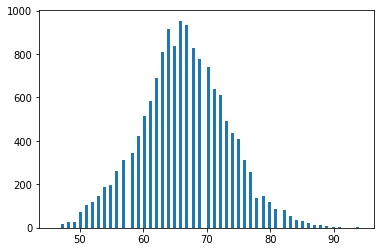

In [117]:
# your code here
y=df_clean['Overall']
x=df_clean.drop(columns=['Overall'])
plt.hist(y,bins=100)

7. Split the data set into a training set and a test set. Choose `test_size` = 0.3 and `random_state` = 123  
Print train and test size      
**Attention**: You are asked to use  [`sklearn.model_selection`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [119]:
# your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
train_test_split(y, shuffle=False)

[0        94
 1        94
 2        92
 3        91
 4        91
          ..
 11052    62
 11053    62
 11054    62
 11055    62
 11056    62
 Name: Overall, Length: 11057, dtype: int64,
 11057    62
 11058    62
 11059    62
 11060    62
 11061    62
          ..
 14738    47
 14739    47
 14740    47
 14741    47
 14742    46
 Name: Overall, Length: 3686, dtype: int64]

8. Fit a linear model to the training set, and then report the training and testing errors obtained (the R2 statistic).   
Calculate and print the following metrics: mse, rmse, mae for the test_set

In [121]:
# your code here
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print('train score =', train_score)
print('test score = {}'.format(test_score))

train score = 0.9370091958866427
test score = 0.9357188804619977


In [125]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math
y_pred = reg.predict(X_test)  # predict the demand for X_test

mse = mean_squared_error(y_test, y_pred)  # Real vs predicted demand for X_test
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print ('mse = {}, rmse = {} \nmae = {} r2 = {}'.format(mse,math.sqrt(mse), mae, r2))

mse = 3.0074136038322967, rmse = 1.734189610115427 
mae = 1.3561926131563 r2 = 0.9357188804619977


### Check residuals

9.1. Plot a histogram of the residuals (difference between `y_test` and `y_pred`

(array([  2.,   2.,   1.,   0.,   2.,   0.,   1.,   0.,   0.,   3.,   2.,
          1.,   3.,   3.,   3.,   2.,   5.,   9.,  10.,   8.,   4.,  10.,
          4.,   6.,  16.,  12.,  15.,  18.,  14.,  21.,  32.,  28.,  27.,
         24.,  35.,  44.,  42.,  53.,  62.,  58.,  65.,  62.,  68.,  87.,
         85., 101., 122., 120., 122., 119., 132., 157., 134., 147., 129.,
        137., 151., 154., 132., 126., 117., 130., 123., 121., 126., 114.,
         83.,  85.,  84.,  63.,  64.,  56.,  47.,  43.,  49.,  30.,  33.,
         19.,  18.,  21.,   7.,  10.,  10.,  10.,   6.,   2.,   6.,   2.,
          4.,   1.,   2.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,
          1.]),
 array([-7.23363253, -7.10021391, -6.96679528, -6.83337666, -6.69995804,
        -6.56653942, -6.4331208 , -6.29970217, -6.16628355, -6.03286493,
        -5.89944631, -5.76602769, -5.63260907, -5.49919044, -5.36577182,
        -5.2323532 , -5.09893458, -4.96551596, -4.83209733, -4.69867871,
        -4.56526009, -4.43

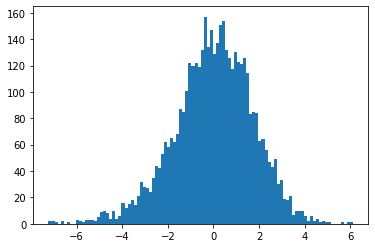

In [124]:
# your code here
plt.hist(y_test - y_pred,bins=100)

9.2. Plot a scatter plot where `y_test` is in the **x** axis and  `y_pred` is in the **y** axis

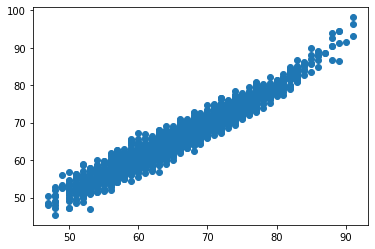

In [126]:
# your code here
plt.scatter(y_test,y_pred)

10. Try to improve the performance of your model, by adding new features

In [127]:
# your code here
for age in df_clean.Age.unique():
    col = 'is_'+str(age)
    df_clean[col] = (df_clean.Age == age).astype("int")
print(df_clean.columns)

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Jersey Number', 'Height',
       'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'is_31', 'is_33', 'is_26', 'is_27', 'is_32', 'is_29',
       'is_28', 'is_24', 'is_30', 'is_19', 'is_25', 'is_22', 'is_23', 'is_34',
       'is_35', 'is_36', 'is_37', 'is_21', 'is_18', 'is_20', 'is_17', 'is_39',
       'is_38', 'is_16'],
      dtyp

train score = 0.9641307330738984
test score = 0.9627501585052349


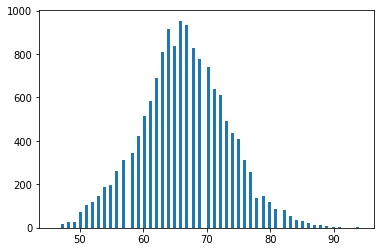

In [128]:
y=df_clean['Overall']
x=df_clean.drop(columns=['Overall'])
plt.hist(y,bins=100)
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=123)
train_test_split(y, shuffle=False)
reg = LinearRegression()
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print('train score =', train_score)
print('test score = {}'.format(test_score))